<h1><center>Spatial variation in b values on Parkfield

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 16})

<h1> 1967 to 2004/08/30 : Data before the earthquake

<h3>Data from NCEDC

1. Use GMT to separate the data along the strike of the fault.
2. Project the earthquakes within ~6km distance across strike on both sides of the fault.
3. Plot data along strike and depth.

In [2]:
# Project data using gmt
f = np.loadtxt('projection4.dat', skiprows=1)
lon = f[:,0]   # latitude
lat = f[:,1]   # longitude
depth = f[:,2] # depth
M = f[:,3]     # magnitude

# Projected Co-ordinates
x = f[:,4]

y = f[:,5]
z = -1*depth
n = len(lat)  # number of data points

In [4]:
import pandas as pd

In [6]:
file001 = pd.read_csv("ParkfieldLocked.htm")

In [10]:
M = file001["Magnitude"]

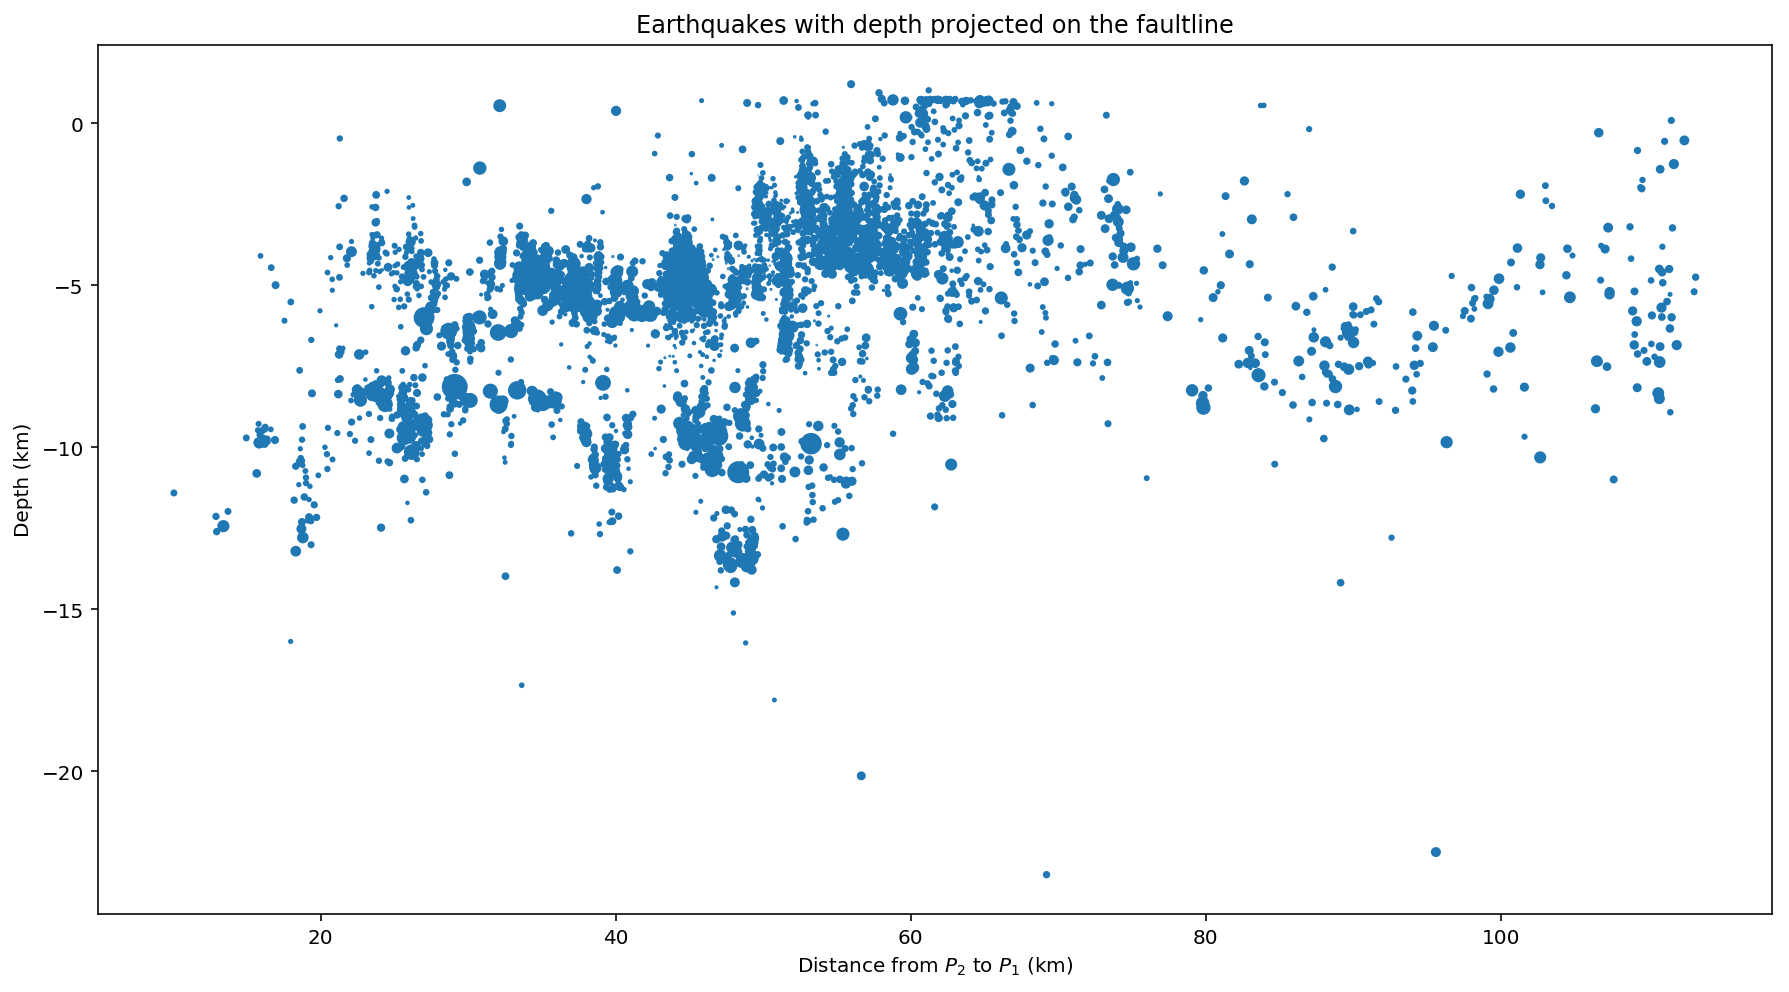

In [5]:
# Plot data in 2D
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(x*110,z, s= 4*(M**2))
#ax.scatter(x[64]*110,z[64], s=5e2, marker = '*', label='Mainshock')
ax.set_xlabel('Distance from ${P_2}$ to ${P_1}$ (km)')
ax.set_ylabel('Depth (km)')
ax.set_title('Earthquakes with depth projected on the faultline')
#plt.legend()
plt.show()

#fig.savefig('Fig9.png', dpi=600)

In [11]:
# MFD

values,base = np.histogram(M, bins = 50)
cumulative = np.cumsum(values[::-1])

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


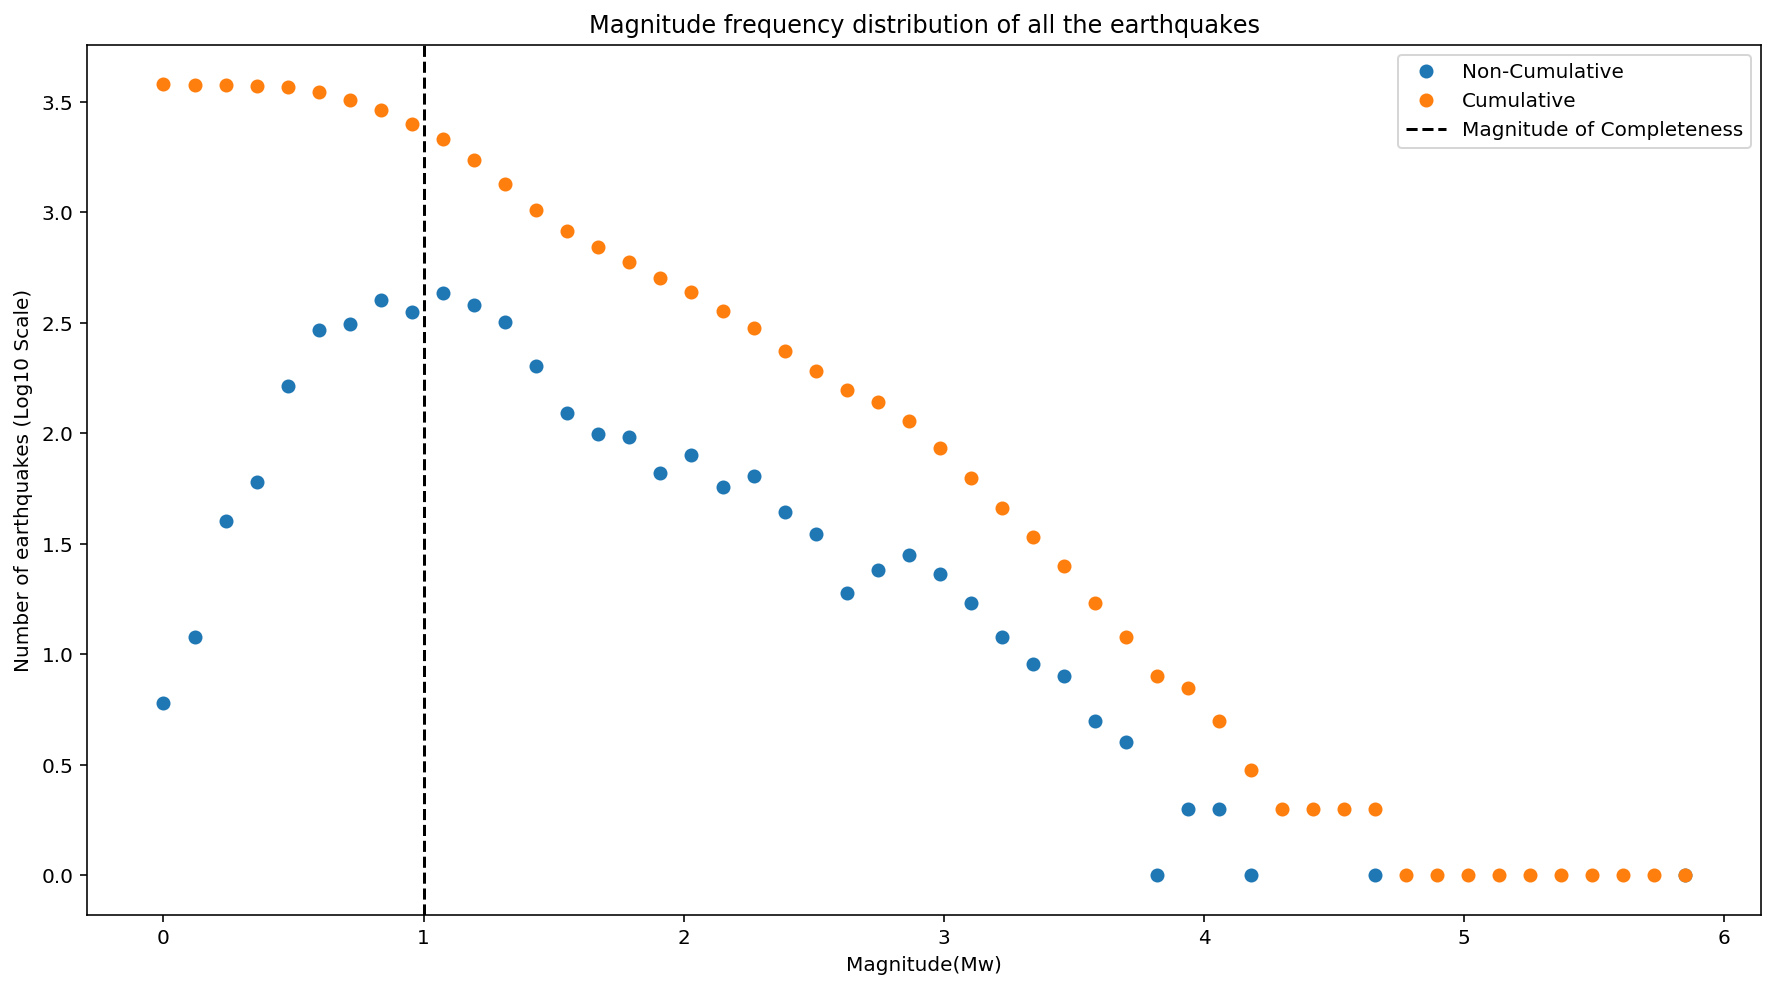

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(base[0:50],np.log10(values), 'o', label='Non-Cumulative')
ax.plot(base[0:50],np.log10(cumulative[::-1]), 'o', label='Cumulative')
ax.axvline(x = 1, ls='--', color='black', label='Magnitude of Completeness')
ax.set_xlabel('Magnitude(Mw)')
ax.set_ylabel('Number of earthquakes (Log10 Scale)')
ax.set_title('Magnitude frequency distribution of all the earthquakes')
plt.legend()
plt.savefig("mfd_complete", dpi=300)
plt.show()

<h3> Spatial clustering of data (k-means)

In [6]:
# Set x and z to the same scale (0-1) for clustering
z_scaled = (z - min(z))/(max(z) - min(z))
x_scaled = (x - min(x))/(max(x) - min(x))

array = np.vstack((x_scaled,z_scaled))

In [7]:
# K-means Clustering

kmeans = KMeans(n_clusters=10, random_state=0).fit(array.T)

k_pred = kmeans.fit_predict(array.T)
centroid = kmeans.cluster_centers_
centroid2 = centroid

# Scale back the centroid locations
centroid2[:,0] = centroid[:,0]*(max(x) - min(x)) + min(x)
centroid2[:,1] = centroid[:,1]*(max(z) - min(z)) + min(z)

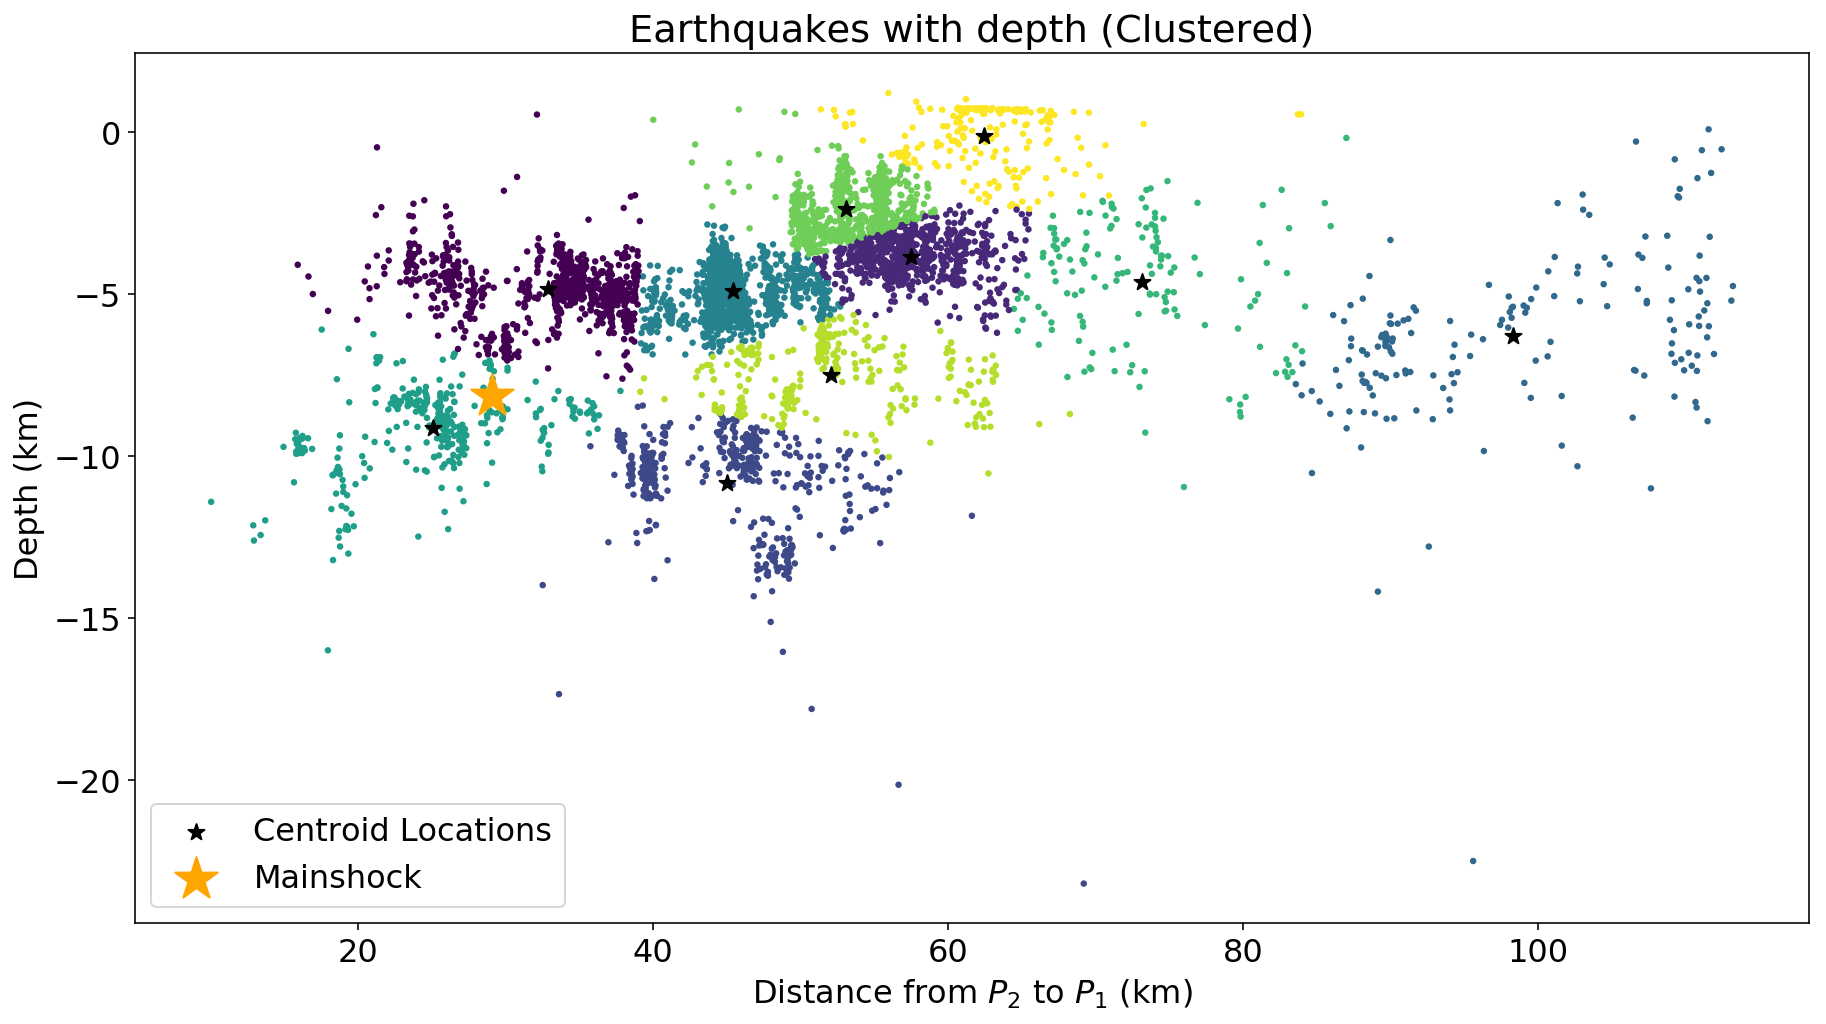

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(x*110,z, s=5, c=k_pred)
ax.scatter(centroid2[:,0]*110, centroid2[:,1], s=70, c='black', 
           marker='*', label='Centroid Locations')
ax.scatter(x[64]*110,z[64], s=5e2, marker = '*', c='orange', label='Mainshock')
ax.set_xlabel('Distance from ${P_2}$ to ${P_1}$ (km)')
ax.set_ylabel('Depth (km)')
ax.set_title('Earthquakes with depth (Clustered)')
plt.legend()
plt.show()

#fig.savefig('Fig8.png', dpi=600)

In [9]:
# Index of each cluster
idx = []

for i in range(max(k_pred)+1):
    idx.append(np.where(k_pred==i)[0])

<h3> b-values of each cluster

In [13]:
def bvalue(M):
    """Linear regression to get the slope of 
        Magnitude vs. Log(Number of Earthquakes)
        
        INPUT: Array of earthquake Magnitudes
        OUTPUT: b-values of that array"""
    
    values,base = np.histogram(M, bins = 50)
    cumulative = np.cumsum(values[::-1])
    
    base = base[0:len(cumulative)]
    
    base = base[np.where(base>1)]
    cumulative = cumulative[np.where(base>1)]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(base, np.log10(cumulative[::-1]))
    
    return slope

In [14]:
b = np.zeros((max(k_pred)+1))

for i in range(max(k_pred)+1):
    b[i] = bvalue(M[idx[i]])

In [15]:
# Color each cluster accoring to their b values
k2 = np.zeros((len(k_pred)))

for j in range(len(k_pred)):
        k2[j] = -b[k_pred[j]]

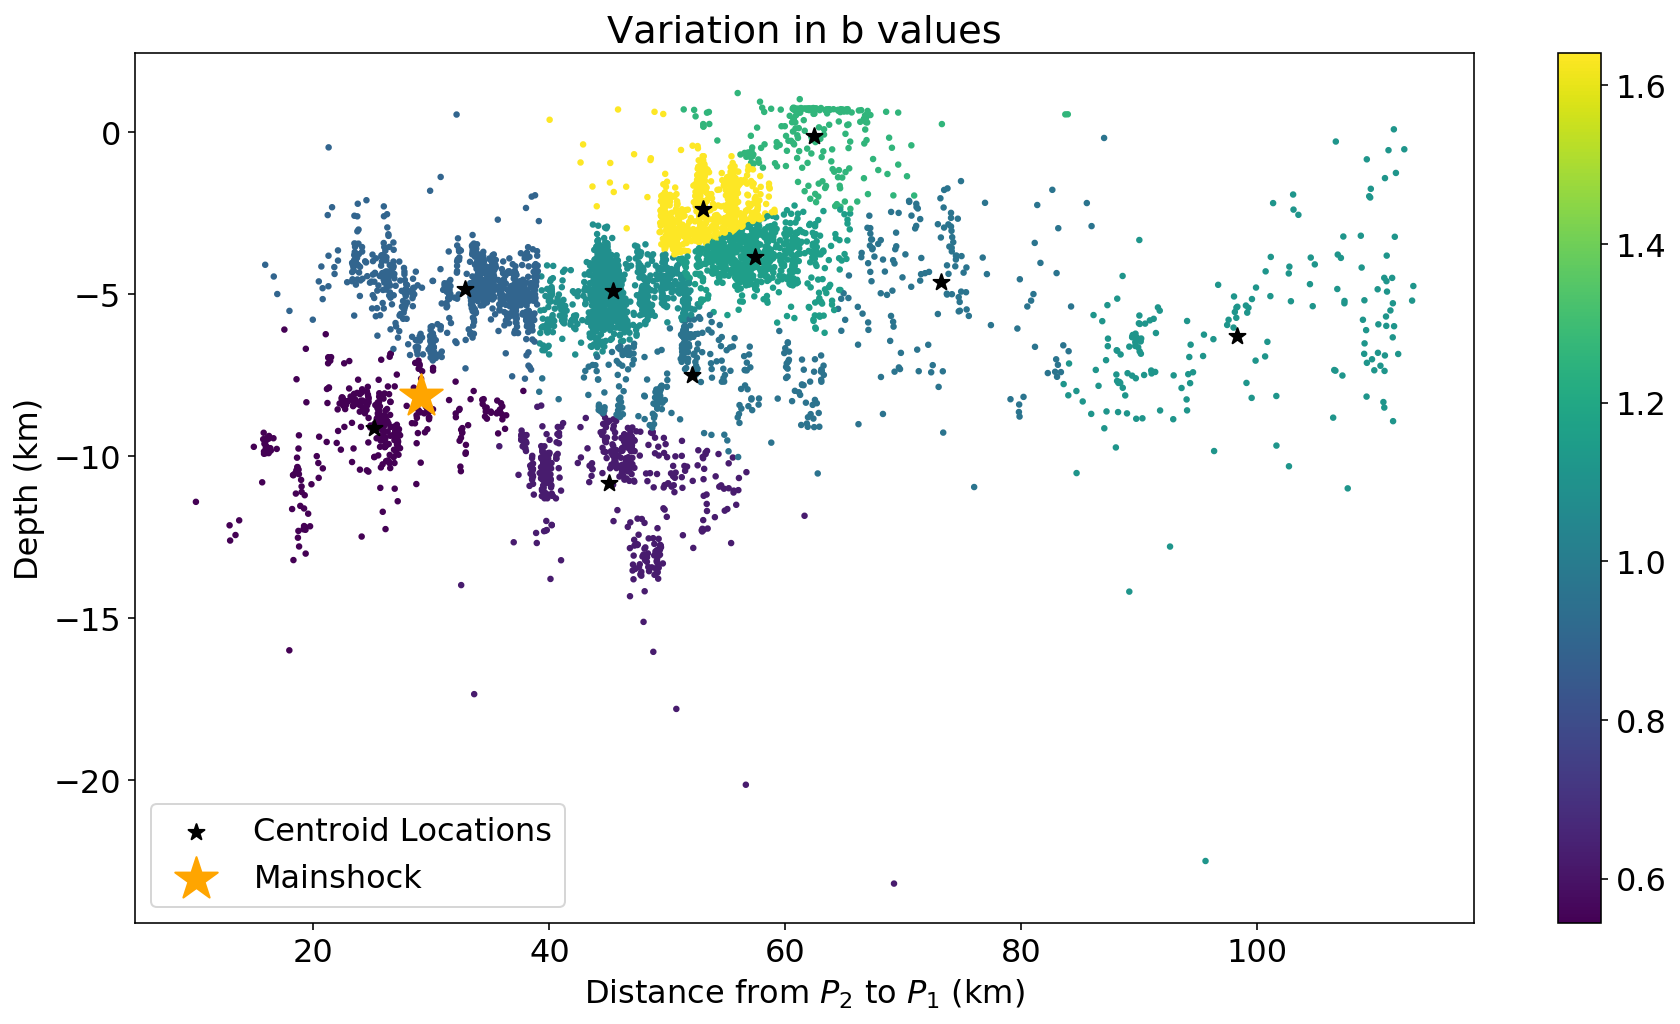

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sc = ax.scatter(x*110,z, s=5, c=k2)
ax.scatter(centroid2[:,0]*110, centroid2[:,1], s=70, c='black', 
           marker='*', label='Centroid Locations')
ax.scatter(x[64]*110,z[64], s=5e2, marker = '*', c='orange', label='Mainshock')
ax.set_xlabel('Distance from ${P_2}$ to ${P_1}$ (km)')
ax.set_ylabel('Depth (km)')
ax.set_title('Variation in b values')
plt.colorbar(sc)
plt.legend()
plt.show()

fig.savefig('Fig8.png', dpi=600)

<h1> 2004/08/30 to 2005/08/30: Parkfield 2004 Earthquake Sequence

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('Parkfield_EQ_.htm')

In [19]:
lat2 = np.array(data["Latitude"])
lon2 = np.array(data["Longitude"])
y = np.array(data["DateTime"])
n2 = len(y)  # number of data points
M2 = np.array(data["Magnitude"])

# convert time yyyy-mm-dd-h-m-s to continuous format
year = np.zeros(n2)
mm = np.zeros(n2)
dd = np.zeros(n2)
h = np.zeros(n2)
m = np.zeros(n2)
s = np.zeros(n2)

for i in range(len(y)):
    year[i] = float(y[i][0:4])
    mm[i] = float(y[i][5:7])
    dd[i] = float(y[i][8:10])
    h[i] = float(y[i][11:13])
    m[i] = float(y[i][14:16])
    s[i] = float(y[i][17:22])

# time = from 0 to 117 (1900-2017) in years
time = (year) + (mm + (dd + (h + (m + s/60)/60)/24)/30)/12 

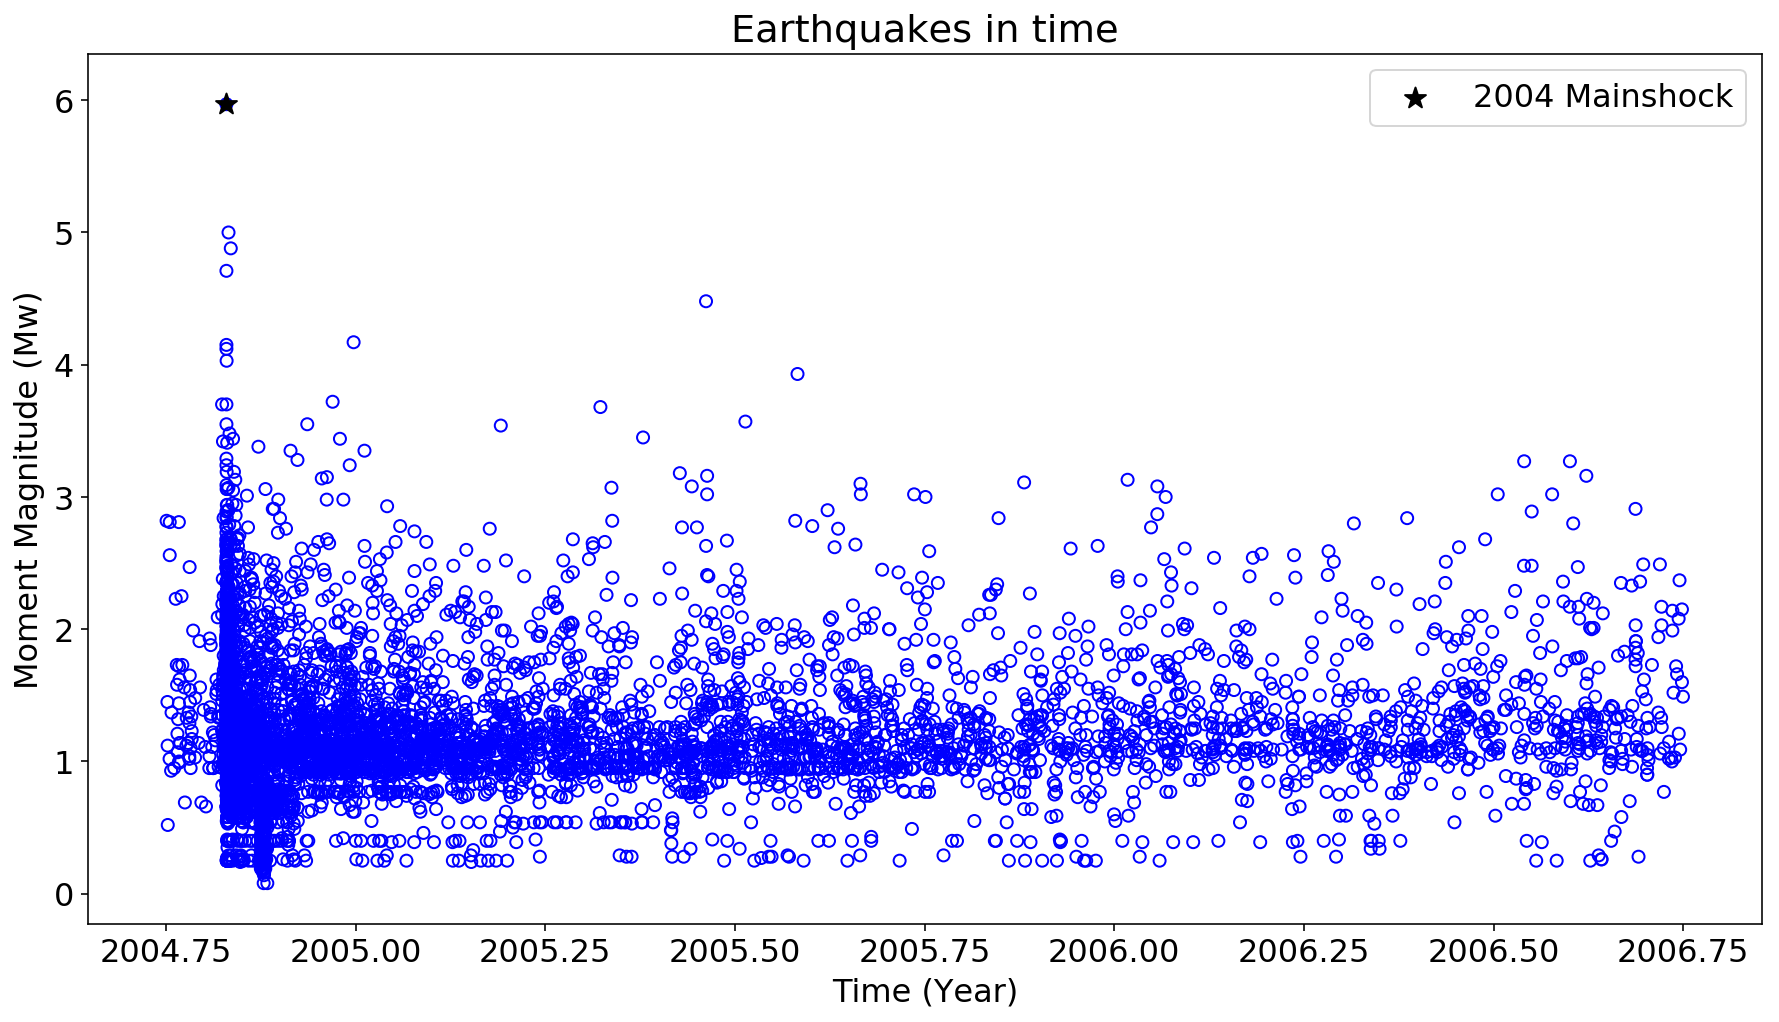

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

ax.scatter(time, M2, facecolors='none', edgecolors='b')
ax.scatter(time[112], M2[112], c='black', s=120, marker='*', 
           label='2004 Mainshock')
ax.set_xlabel('Time (Year)')
ax.set_ylabel('Moment Magnitude (Mw)')
ax.set_title('Earthquakes in time')
plt.legend()
plt.show()

fig.savefig('Fig6.png', dpi=600)

<h1> Temporal Variation of b-value in the locked segment

In [22]:
data2 = pd.read_csv('ParkfieldLocked.htm')

In [23]:
lat = np.array(data2["Latitude"])
lon = np.array(data2["Longitude"])
y = np.array(data2["DateTime"])
n = len(y)  # number of data points
M = np.array(data2["Magnitude"])

# convert time yyyy-mm-dd-h-m-s to continuous format
year = np.zeros(n)
mm = np.zeros(n)
dd = np.zeros(n)
h = np.zeros(n)
m = np.zeros(n)
s = np.zeros(n)

for i in range(len(y)):
    year[i] = float(y[i][0:4])
    mm[i] = float(y[i][5:7])
    dd[i] = float(y[i][8:10])
    h[i] = float(y[i][11:13])
    m[i] = float(y[i][14:16])
    s[i] = float(y[i][17:22])

# time = from 0 to 117 (1900-2017) in years
time = (year) + (mm + (dd + (h + (m + s/60)/60)/24)/30)/12 

In [24]:
# Temporal b values
b_temp = np.zeros((14))
i = 0

In [25]:
# interseismic period 1
t1 = 2013
t2 = 2018

M_temp = M[(time>t1) & (time<t2)]

b_temp[i] = bvalue(M_temp)
i = i+1

In [28]:
tt = np.array([1976, 1983.5, 1991, 2000, 2004.41, 2004.83, 2004.87,
               2004.95, 2005.25, 2006, 2007.25, 2009, 2011.5, 2015.5])